# Medical Insurance Cost Prediction using Machine Learning with Python 

### Objective of the Project:

- To built & train a Regression Model, that can predict the result at a minimum acuracy of 75%.

### Steps Taken: 
- Importing necessary python libraries.
- Data Collection.
- Data Analysis, to gether the meaningful insights from the Data labels such as age, sex, bmi, children, smoker & region column.
- Data Pre-processing.
- Splitting the data for training & testing of the model.
- Model Training.
- Model Evaluation with both training & testing data.
- Building a Predictive system.
- Conclusion.

#### 1. Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### 2. Data Collection:

In [2]:
# loading the data into Pandas DataFrame:

insurance_dataset = pd.read_csv(r"C:\Users\HP\Desktop\xmassbesra\Python_Project\Insurance project\insurance.csv")

In [3]:
# First 5 rows of data:

insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows & columns:

insurance_dataset.shape

(1338, 7)

In [5]:
# getting some information about the dataset:

insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Checking for missing values:

insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 3. Data Analysis:

In [7]:
# Statistical measures of the dataset: (it only gives data for numerical values)

insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


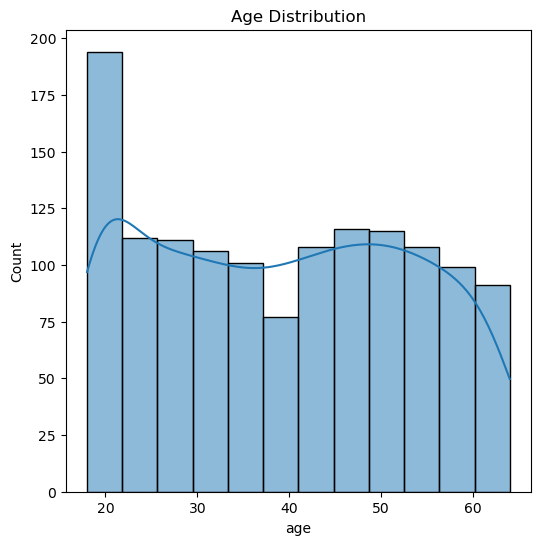

In [8]:
# Distribution of age value:

plt.figure(figsize=(6,6))
ax = sns.histplot(insurance_dataset['age'], kde=True)
plt.title('Age Distribution')
plt.show()

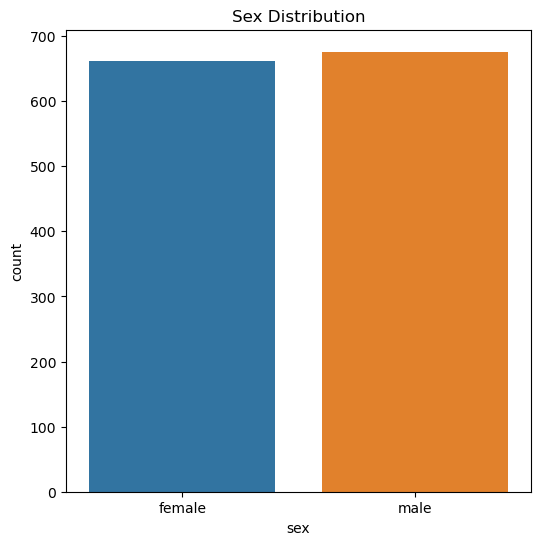

In [9]:
# Gender Column:

plt.figure(figsize=(6,6))
ax = sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

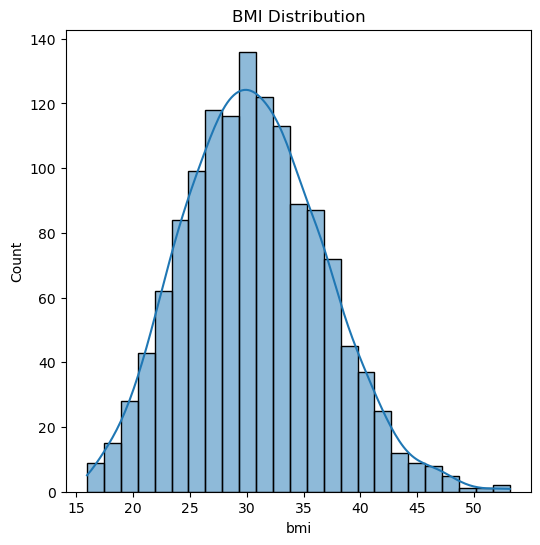

In [11]:
# bmi distribution: (Normal BMI Range --> 18.5 to 24.9)

plt.figure(figsize=(6,6))
ax = sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

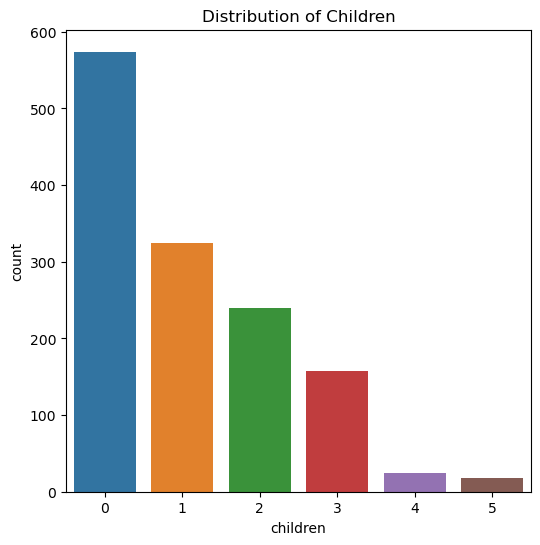

In [12]:
# Children column:

plt.figure(figsize=(6,6))
ax = sns.countplot(insurance_dataset, x='children')
plt.title('Distribution of Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

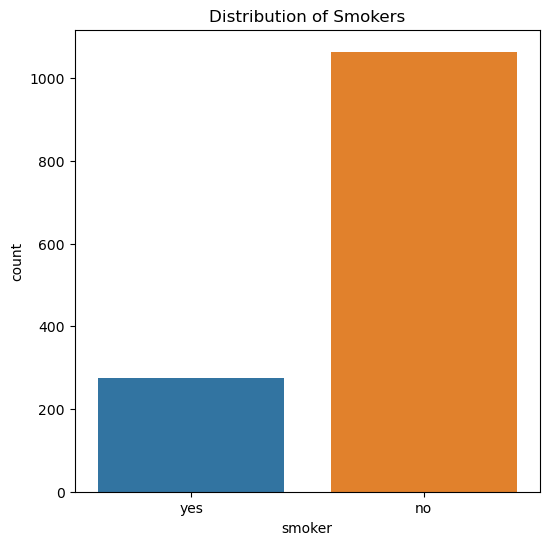

In [14]:
# Smoker Column:

plt.figure(figsize=(6,6))
ax = sns.countplot(insurance_dataset, x='smoker')
plt.title('Distribution of Smokers')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

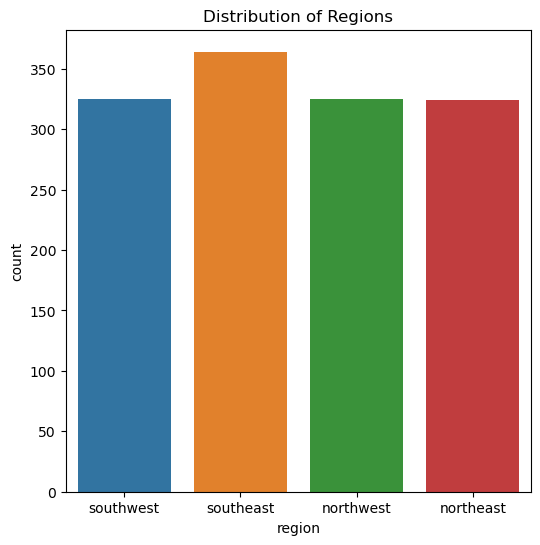

In [16]:
# Region Column:

plt.figure(figsize=(6,6))
ax = sns.countplot(insurance_dataset, x='region')
plt.title('Distribution of Regions')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

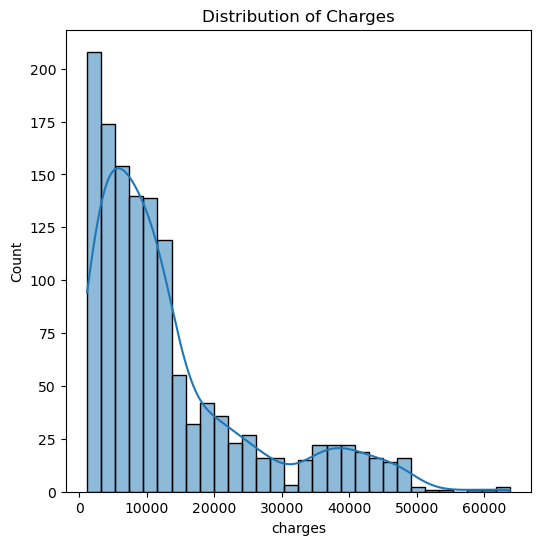

In [19]:
# Distribution of charges column:

plt.figure(figsize=(6,6))
ax = sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

#### 4. Data Pre-processing

In [20]:
# Encoding the sex column: (permanently replacing the categorical values of sex into numeric values)
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding the smoker column: 
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding the region column:
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [21]:
# Transformed encoded dataframe: 

insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


#### 5. Splitting the data into Features and Targets:

In [22]:
# X (features) = age, sex, bmi, smoker and region columns. 
# Y (target) = charges column.

X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [23]:
# Checking the newly created features dataframe:

X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [24]:
# checking the new created target series:

y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [25]:
# creating 4 separated array for train & test, the data size for the test is 20% of the whole features data.
# data will be picked randomly from the dataset.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [26]:
# checking out all the features data with X_train and X_test:

print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [27]:
# checking out all the target data series with Y_train and Y_test:

print(y.shape, y_train.shape, y_test.shape)

(1338,) (1070,) (268,)


#### 6. Model Training:

In [28]:
# Loading the Linear Regression Model:

regressor = LinearRegression()

In [64]:
# fitting the data into the model:

regressor.fit(X_train, y_train)

LinearRegression()

#### 7. Model Evaluation:

In [41]:
# c - Intercept value: 

c = regressor.intercept_

In [42]:
c

11357.668742540942

In [43]:
# m - slope value:

m = regressor.coef_

In [44]:
m

array([   251.40512196,     26.11715966,    330.64637157,    580.27438296,
       -23928.10171061,    212.22242728])

In [65]:
# prediction on training data:

training_data_prediction = regressor.predict(X_train)

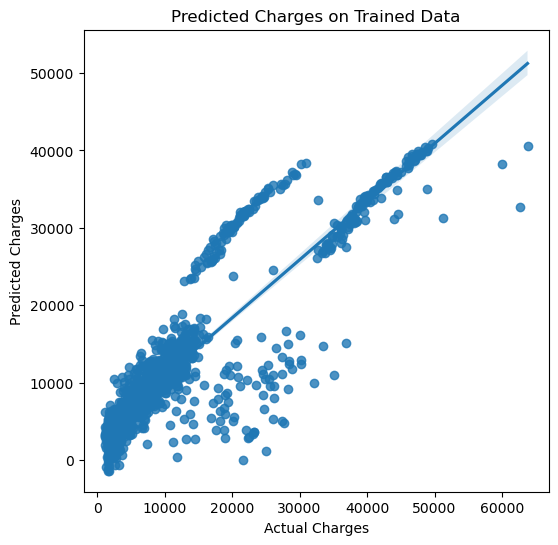

In [66]:
# Predicted Charges on Trained Data with Best Fit Line:

plt.figure(figsize=(6,6))
sns.regplot(x=y_train, y=training_data_prediction)
plt.title('Predicted Charges on Trained Data')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [67]:
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R Squared Value:', r2_train)

R Squared Value: 0.751505643411174


In [68]:
# prediction on test data:

test_data_prediction = regressor.predict(X_test)

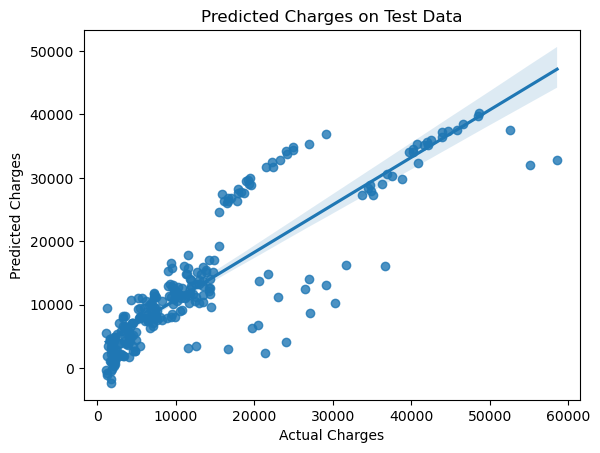

In [69]:
# Predicted Charges on Test Data with Best Fit Line:

sns.regplot(x=y_test, y=test_data_prediction)
plt.title('Predicted Charges on Test Data')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [70]:
# performance matrics (R-squared value):

r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R Squared Value:', r2_test)

R Squared Value: 0.7447273869684077


#### 8. Building a Predictive System:

In [34]:
# Input data:

input_data = (37,0,29.83,2,1,0)

In [35]:
# changing tuple data into numpy array:

input_data_as_numpy_array = np.array(input_data)

In [36]:
# reshaping the array:

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [37]:
prediction = regressor.predict(input_data_reshaped)
print('The charge for medical insurance USD: ', prediction[0])

The charge for medical insurance USD:  7755.286574228021


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### 9. Conclusion: 